<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Objective" data-toc-modified-id="Objective-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Objective</a></span></li><li><span><a href="#Literature" data-toc-modified-id="Literature-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Literature</a></span></li><li><span><a href="#Methodology" data-toc-modified-id="Methodology-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Methodology</a></span></li><li><span><a href="#Exogenous-Variables:" data-toc-modified-id="Exogenous-Variables:-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Exogenous Variables:</a></span></li></ul></li><li><span><a href="#Bitcoin-Prices" data-toc-modified-id="Bitcoin-Prices-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Bitcoin Prices</a></span></li><li><span><a href="#Exogenous-Variables" data-toc-modified-id="Exogenous-Variables-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exogenous Variables</a></span><ul class="toc-item"><li><span><a href="#Google-Trends" data-toc-modified-id="Google-Trends-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Google Trends</a></span></li><li><span><a href="#Bitcoin-Extra-Variables" data-toc-modified-id="Bitcoin-Extra-Variables-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Bitcoin Extra Variables</a></span></li><li><span><a href="#Merge-&amp;-Get-New-Bitcoin-Data" data-toc-modified-id="Merge-&amp;-Get-New-Bitcoin-Data-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Merge &amp; Get New Bitcoin Data</a></span></li></ul></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modelling</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Baseline:-No-Exogenous-Variables" data-toc-modified-id="Baseline:-No-Exogenous-Variables-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Baseline: No Exogenous Variables</a></span></li><li><span><a href="#Add-Exogenous-Variables" data-toc-modified-id="Add-Exogenous-Variables-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>Add Exogenous Variables</a></span></li><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-4.0.3"><span class="toc-item-num">4.0.3&nbsp;&nbsp;</span>Hyperparameter Tuning</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

__Libraries__: 

In [542]:
import quandl
from pytrends.request import TrendReq
from pytrends import dailydata
import pandas_datareader as pdr
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import kpss
import itertools

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

import datetime
import time

from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
from fbprophet.utilities import regressor_coefficients

import sklearn.metrics as metrics

pd.set_option('display.float_format',lambda x: '%.2f' % x)
%matplotlib inline
plt.rcParams["figure.figsize"] = (20, 10)

# Introduction

## Objective

Using Bitcoin data (from previous exercise), and exogenous variables (from Google Trends search patterns extra Bitcoin information), we will attempt to find lagged series which would be strong predictors of Bitcoin price.

## Literature

Do Google Trends Forecast Bitcoins? Stylized Facts and Statistical Evidence
https://upcommons.upc.edu/bitstream/handle/2117/188441/AAALbitcoinITISE19.pdf;jsessionid=70D36BA505770011D440E269078F007D?sequence=1

Info on extra variables
https://towardsdatascience.com/time-series-modeling-of-bitcoin-prices-5133edfec30b

## Methodology

... 

## Exogenous Variables:

- __Interest over time__: Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.
https://medium.com/@bewerunge.franz/google-trends-how-to-acquire-daily-data-for-broad-time-frames-b6c6dfe200e6
- __Cryptocurrencies__: 

# Bitcoin Prices

__Bitcoin Data__: 

In [405]:
data = pdr.get_data_yahoo('BTC-USD', start='2015-01-01', end='2020-12-30')

In [406]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-01,320.43,314.00,320.43,314.25,8036550.00,314.25
2015-01-02,315.84,313.57,314.08,315.03,7860650.00,315.03
2015-01-03,315.15,281.08,314.85,281.08,33054400.00,281.08
2015-01-04,287.23,257.61,281.15,264.20,55629100.00,264.20
2015-01-05,278.34,265.08,265.08,274.47,43962800.00,274.47


Preprocessing: 

In [407]:
# Removing duplicate values
duplicated = data[data.index.duplicated()].index
duplicated_to_store = data[data.index.isin(duplicated)].iloc[range(1, 12, 2), :]
data = data.drop(data.index[data.index.isin(duplicated)], axis=0)
data = pd.concat([data, duplicated_to_store], axis=0)

# Filling missing values
dates = pd.DataFrame(pd.date_range(start='2015-01-01', end='2020-12-31').rename('Date'))
data = data.merge(dates, on='Date', how='right')
data = data.sort_values('Date')
data = data.ffill(axis=0)
data.index = pd.to_datetime(data.Date)

Time Series Analysis: 

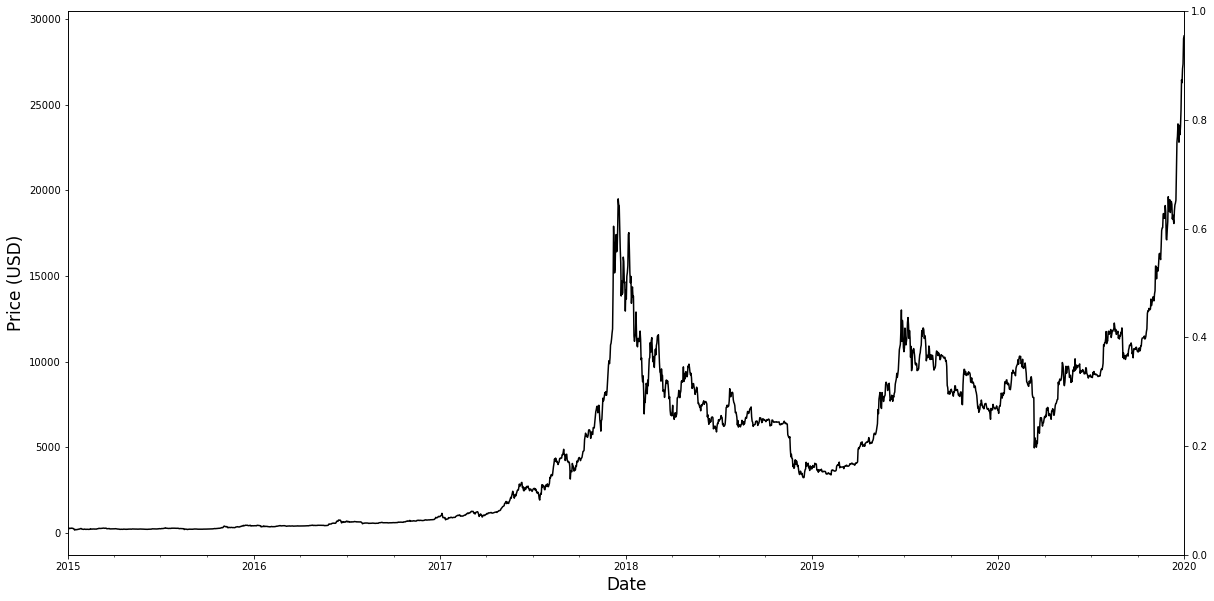

In [408]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Plot Price
data.Close.plot(ax=ax1, color='black', label='Price')
ax1.set_ylabel('Price (USD)', fontsize=17)

# Set x-axis
date_form = DateFormatter("%Y")
ax1.xaxis.set_major_formatter(date_form)
ax1.set_xlabel('Date', fontsize=17)

plt.show()

Bitcoin prices appear to follow quite different pattenrs from 2015-2019, ans 2019 onwards. An explonential increase in prices at the end of 2017 was met with a significant drop just after. Only at the start of 2019 does the variability seem to decrease, and prices appear to start following an upwards trend. 

As we will be modelling Bitcoin price, we want to reduce noise in the dependent variable. Up until 2019, the bitcoin market had a different behavior, so we will sample from 2019 onwards. 

In [409]:
data = data['2019-01-01':]

# Exogenous Variables

## Google Trends

The pytrends interface to Google Trends only returns weekly data. As we have Bitcoing at a daily level, it would be good to actually get this data as daily. After searching online, we found a new method from the library that gets this data. It uses its own methods to scale the data, as Google Trends actually only presents us with weekly data. We will check both to see if they are similar: 

Weekly Data

In [362]:
pytrend = TrendReq(hl='en-US', tz=360)
keywords = pd.read_csv("keyword_list.csv").Keywords.tolist()
pytrend.build_payload(kw_list=['Bitcoin'],
                          cat=0,
                          timeframe='2019-01-01 2021-02-28',
                          geo='US')
new_data = pytrend.interest_over_time().drop('isPartial', axis=1)

Daily Data

In [198]:
bitcoin = dailydata.get_daily_data('Bitcoin', 2019, 1, 2021, 2, geo='US', verbose=False)

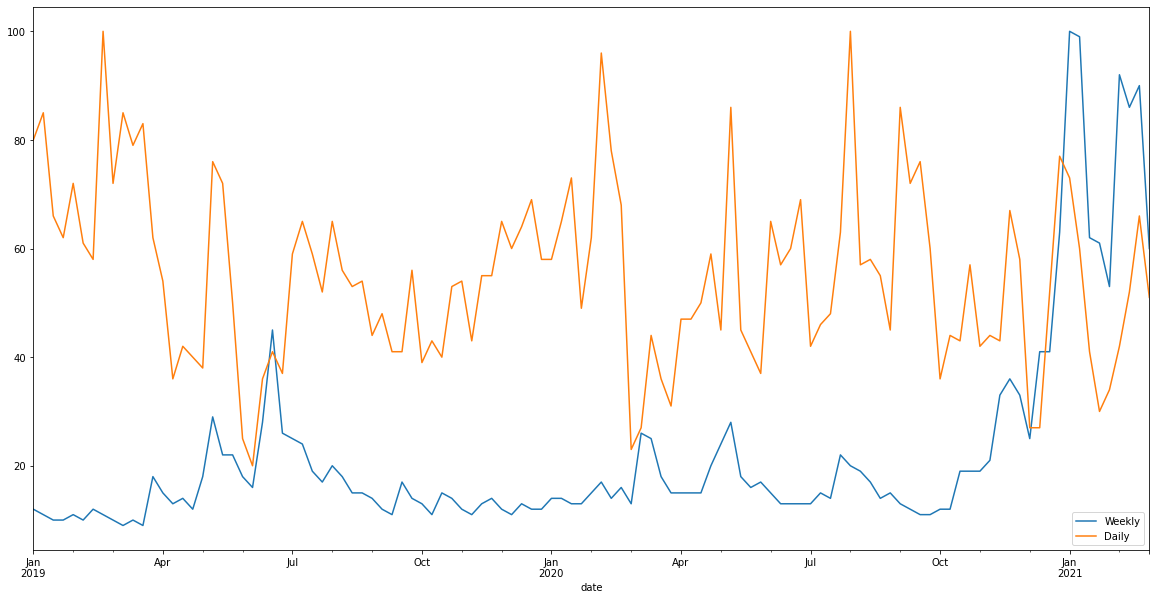

In [199]:
new_data.plot()
bitcoin.iloc[:, 0].plot()
plt.legend(['Weekly', 'Daily'])
plt.show()

Weekly data appears to be much more significant that daily data, that does not appear to follow any particular pattern. This is because, when scaling searched within 1 and 100, daily data actually looses its significance. Therefore, use weekly data. 

Get GTrends data for Bitcoin, Cryptocurrency and Crypto. 

In [363]:
pytrend = TrendReq(hl='en-US', tz=360)
keywords = ['Bitcoin', 'Crypto', 'Cryptocurrency']
pytrend.build_payload(kw_list=keywords,
                          cat=0,
                          timeframe='2018-12-30 2021-02-28',
                          geo='US')
gtrends = pytrend.interest_over_time().drop('isPartial', axis=1)
gtrends = gtrends.resample('d').ffill()
gtrends = gtrends.loc['2020-01-01':]

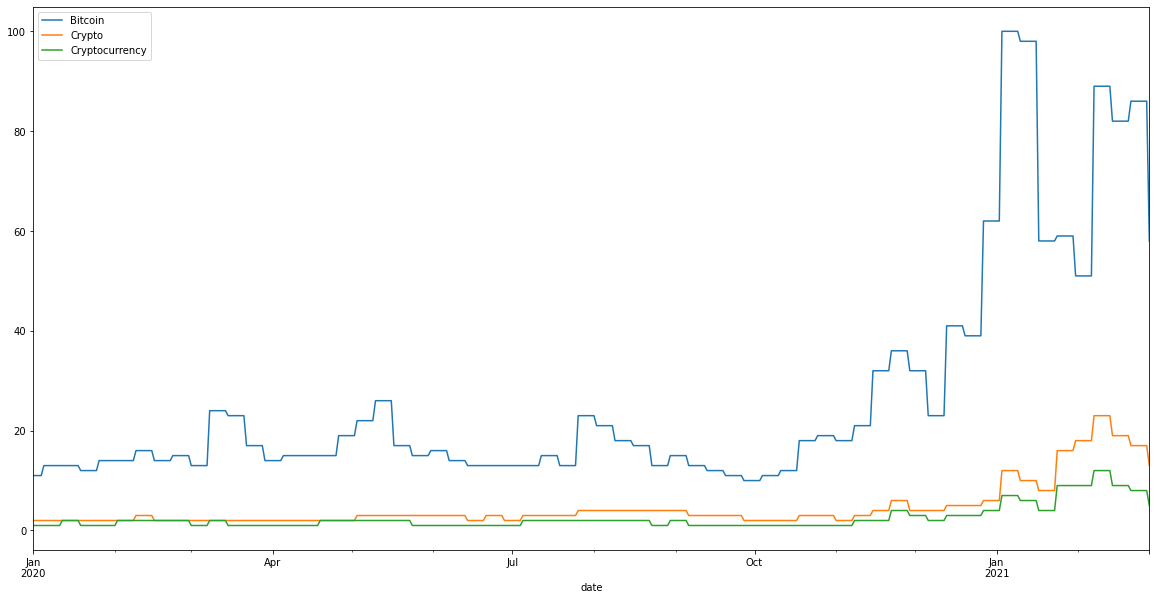

In [222]:
gtrends.plot()
plt.show()

## Bitcoin Extra Variables

The Bitcoin network itself possesses a wealth of information. These include the number of unique addresses, transaction volumes, total Bitcoins currently in circulation, and the gradual difficulty in mining through the hash rate. These information is up-to-date and publicly available from Quandl.

In [202]:
bitcoin = pd.concat([quandl.get("BCHAIN/MWNUS"), quandl.get("BCHAIN/MWNTD")], axis=1) 
bitcoin.columns = ['Users', 'Transactions']
bitcoin = bitcoin['2020-01-01':'2021-02-28']
bitcoin = bitcoin.bfill()

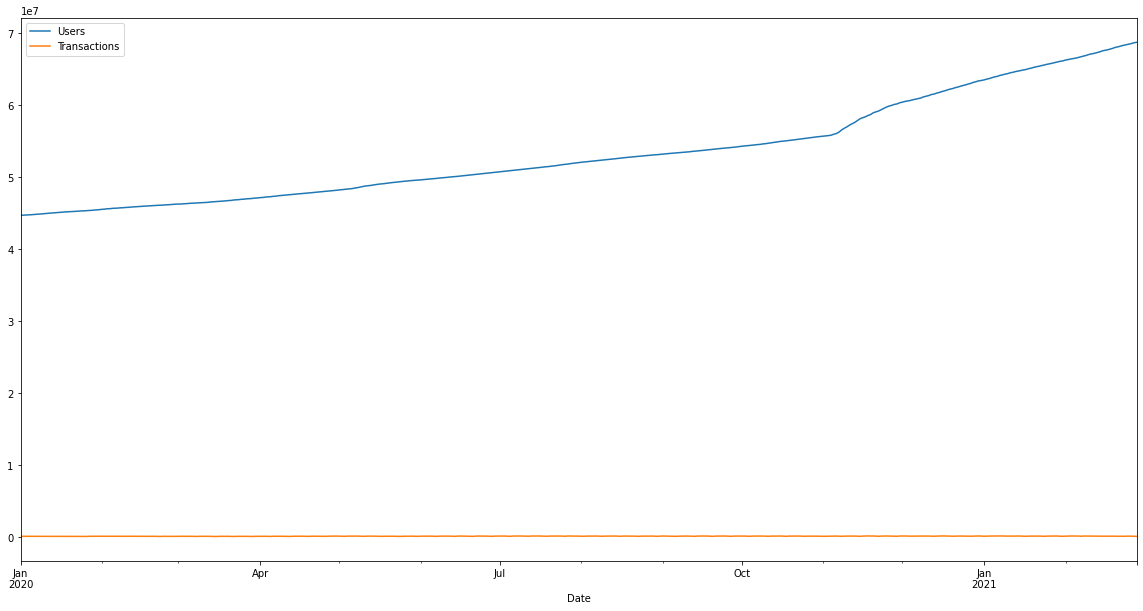

In [369]:
bitcoin.plot()
plt.show()

## Merge & Get New Bitcoin Data

Now we will merge all the datasets for modelling

In [476]:
data_ = data.merge(gtrends, how='right', left_index=True, right_index=True) .\
            merge(bitcoin, how='right', left_index=True, right_index=True)
data_ = data_.iloc[:, 6:]

In [477]:
data_.head()

,Adj Close,Bitcoin,Crypto,Cryptocurrency,Users,Transactions
Date,,,,,,
2020-01-01,7200.17,11,2,1,44710899.00,84820.00
2020-01-02,6985.47,11,2,1,44729012.00,84820.00
2020-01-03,7344.88,11,2,1,44748738.00,84820.00
2020-01-04,7410.66,11,2,1,44768951.00,84820.00
2020-01-05,7411.32,13,2,1,44793044.00,84820.00


In [478]:
new_close = pdr.get_data_yahoo('BTC-USD', start='2021-01-01', end='2021-02-27')['Adj Close']
data_['Adj Close'] = data_['Adj Close'].fillna(new_close)

Now prepare data for prophet input: 

In [483]:
data_['ds'] = data_.index
data_ = data_.rename(columns={'Adj Close':'y'})
train = data_[data_.ds < datetime.datetime(2021, 1, 1)]
test = data_[data_.ds >= datetime.datetime(2021, 1, 1)]

In [484]:
train.tail()

,y,Bitcoin,Crypto,Cryptocurrency,Users,Transactions,ds
Date,,,,,,,
2020-12-27,26272.29,62,6,4,63057974.00,98352.00,2020-12-27
2020-12-28,27084.81,62,6,4,63199039.00,110939.00,2020-12-28
2020-12-29,27362.44,62,6,4,63288279.00,115581.00,2020-12-29
2020-12-30,28840.95,62,6,4,63407664.00,128884.00,2020-12-30
2020-12-31,29001.72,62,6,4,63457366.00,121367.00,2020-12-31


In [485]:
test.head()

,y,Bitcoin,Crypto,Cryptocurrency,Users,Transactions,ds
Date,,,,,,,
2021-01-01,29374.15,62,6,4,63530742.00,89018.00,2021-01-01
2021-01-02,32127.27,62,6,4,63639909.00,108080.00,2021-01-02
2021-01-03,32782.02,100,12,7,63721612.00,108206.00,2021-01-03
2021-01-04,31971.91,100,12,7,63842886.00,121481.00,2021-01-04
2021-01-05,33992.43,100,12,7,63953197.00,126610.00,2021-01-05


# Modelling

Now we turn to modelling while using the exogenous variables. Bitcoin adjusted Closing value: 

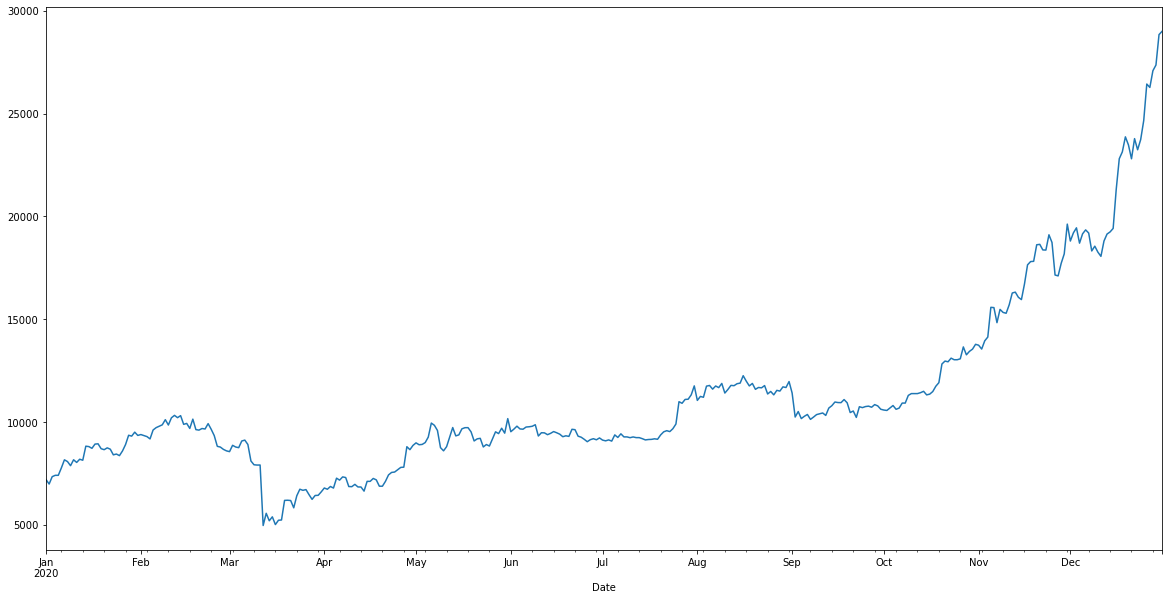

In [486]:
train['y'].plot()
plt.show()

In [487]:
print(f'P-value: {kpss(train["y"].dropna(), "c")[1]}')

P-value: 0.01


It is a non-stationary time series. However, prophet models use seasonality and trend, and does not require stationary time series as an input, therefore, proceed modelling prices

### Baseline: No Exogenous Variables

In [505]:
m = Prophet()
m.fit(train)

forecast = m.predict(test)
forecast = forecast.set_index(forecast.ds)

yhat = forecast.yhat[forecast.ds >= '2021-01-01']
MAE = metrics.mean_absolute_error(yhat, test.y)
print(f'Mean Absolute Error: {round(MAE, 2)}')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Error: 10306.83


<AxesSubplot:>

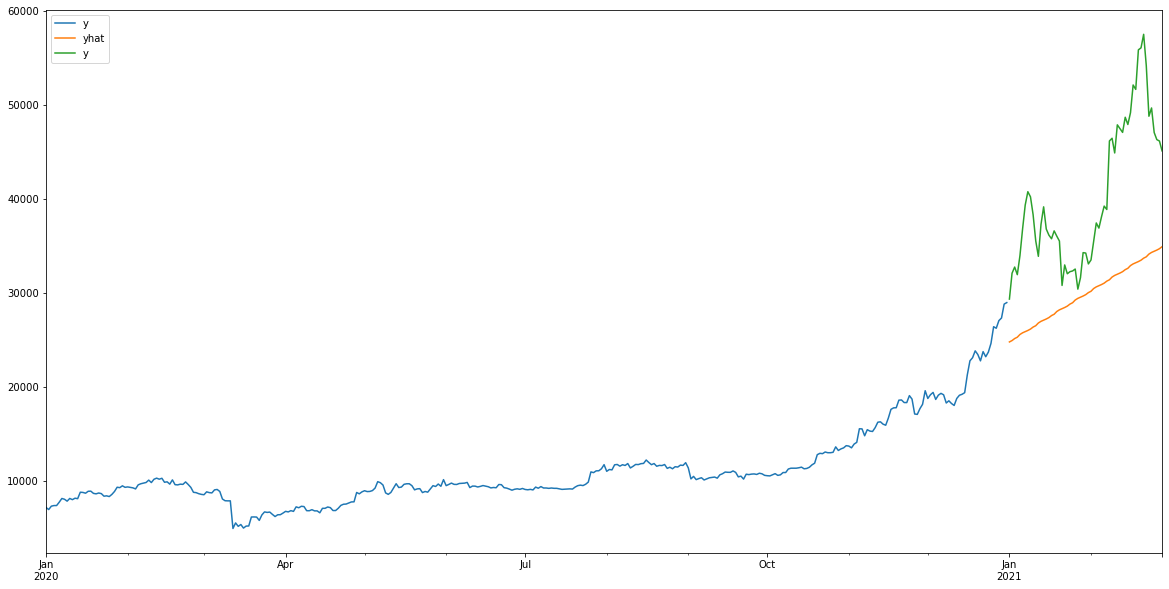

In [500]:
pd.concat([train.y, yhat, test.y], axis=1).plot()

Talk about model, not that good. 

### Add Exogenous Variables

Add new Variables

In [494]:
train.head()

,y,Bitcoin,Crypto,Cryptocurrency,Users,Transactions,ds
Date,,,,,,,
2020-01-01,7200.17,11,2,1,44710899.00,84820.00,2020-01-01
2020-01-02,6985.47,11,2,1,44729012.00,84820.00,2020-01-02
2020-01-03,7344.88,11,2,1,44748738.00,84820.00,2020-01-03
2020-01-04,7410.66,11,2,1,44768951.00,84820.00,2020-01-04
2020-01-05,7411.32,13,2,1,44793044.00,84820.00,2020-01-05


In [506]:
m1 = Prophet()
m1.add_regressor('Bitcoin')
m1.fit(train)

forecast = m1.predict(test)
forecast = forecast.set_index(forecast.ds)

yhat = forecast.yhat[forecast.ds >= '2021-01-01']
MAE1 = metrics.mean_absolute_error(yhat, test.y)
print(f'Mean Absolute Error: {round(MAE1, 2)}')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Error: 8293.1


Improves mean absolute Error significantly! Talk about this here

In [511]:
print(f'Decreases the error by {round((MAE - MAE1)/MAE, 3)}%')

Decreases the error by 0.195%


<AxesSubplot:>

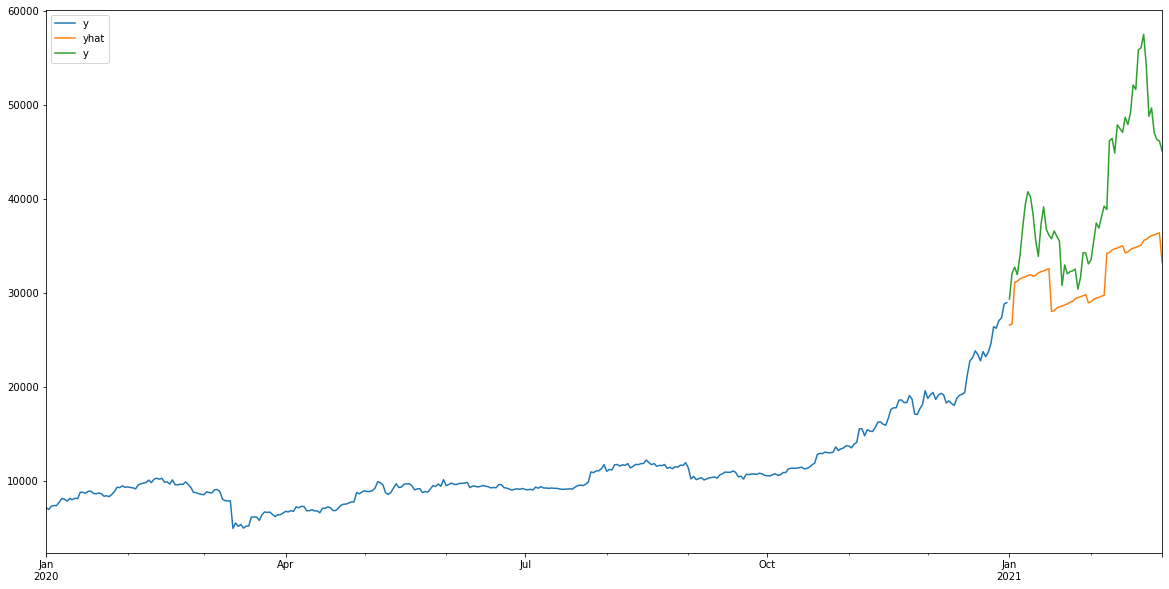

In [507]:
pd.concat([train.y, yhat, test.y], axis=1).plot()

The estimated beta coefficient for each regressor roughly represents the increase in prediction value for a unit increase in the regressor value (note that the coefficients returned are always on the scale of the original data)

https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html here there is information about coefficients

Model is: 

```additive:       y(t) = trend(t) + seasonality(t) + beta * regressor(t)
multiplicative: y(t) = (1 + seasonality(t) + beta * regressor(t)) * trend(t)```

In [514]:
regressor_coefficients(m1)

,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,Bitcoin,additive,18.39,115.32,115.32,115.32


Try all possible combinaions

In [518]:
regressors = train.drop(['y', 'ds'], axis=1).columns
m2 = Prophet()
for r in regressors: 
    m2.add_regressor(r)
m2.fit(train)

forecast = m2.predict(test)
forecast = forecast.set_index(forecast.ds)

yhat = forecast.yhat[forecast.ds >= '2021-01-01']
MAE1 = metrics.mean_absolute_error(yhat, test.y)
print(f'Mean Absolute Error: {round(MAE1, 2)}')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Error: 7172.5


In [519]:
regressor_coefficients(m2)

,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,Bitcoin,additive,18.39,89.54,89.54,89.54
1,Crypto,additive,2.92,351.17,351.17,351.17
2,Cryptocurrency,additive,1.63,-81.04,-81.04,-81.04
3,Users,additive,51451455.46,0.00,0.00,0.00
4,Transactions,additive,99681.00,0.01,0.01,0.01


Now find the best combiantion!!!! So as to not add redundant information

In [537]:
models = []
for L in range(len(regressors)+1):
    for subset in itertools.combinations(regressors, L):
        models.append(subset)
models = models[1:]
print(models)

In [544]:
def fit_getMAE(regressors):
    m = Prophet()
    for r in regressors: 
        m.add_regressor(r)
    m.fit(train)

    forecast = m.predict(test)
    forecast = forecast.set_index(forecast.ds)

    yhat = forecast.yhat[forecast.ds >= '2021-01-01']
    return metrics.mean_absolute_error(yhat, test.y)

In [546]:
MAES = [fit_getMAE(regressors) for regressors in models]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

Errors of all models

In [549]:
MAES

[8293.098868059502,
 5668.053414095265,
 8235.514900056258,
 12093.614611196037,
 10481.682620999998,
 5785.805305223091,
 7991.5854493264005,
 9655.831906044428,
 8442.08595655281,
 5825.091788405366,
 6319.491854422142,
 5699.572237123762,
 9776.417505801472,
 8366.632728500446,
 12095.771026943796,
 5833.794611645622,
 7558.151218108475,
 5848.9636187581145,
 9443.735950087701,
 8173.4562131383,
 9682.608257661159,
 6464.9509738867255,
 5834.152852340758,
 6288.557414536562,
 9808.980925590056,
 7419.9436733015,
 5836.022020447195,
 7106.437967945852,
 9540.4464798074,
 6398.744322916842,
 7172.498018545138]

Second i minimum

In [555]:
MAES == min(MAES)

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

Best model:

In [559]:
models[1][0]

'Crypto'

Fit and plot

In [560]:
m3 = Prophet()
m3.add_regressor(models[1][0])
m3.fit(train)

forecast = m3.predict(test)
forecast = forecast.set_index(forecast.ds)

yhat = forecast.yhat[forecast.ds >= '2021-01-01']
MAE1 = metrics.mean_absolute_error(yhat, test.y)
print(f'Mean Absolute Error: {round(MAE1, 2)}')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Error: 5668.05


<AxesSubplot:>

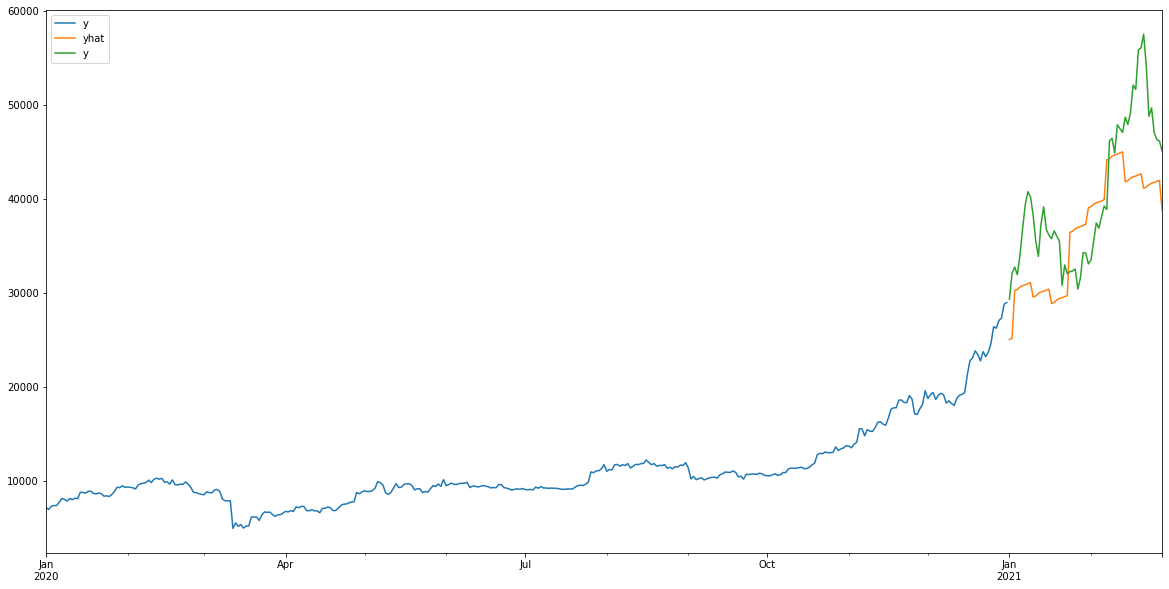

In [562]:
pd.concat([train.y, yhat, test.y], axis=1).plot()

### Hyperparameter Tuning

In [563]:
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'holidays_prior_scale': [0.001, 0.01, 0.1, 0.5], 
    'seasonality_mode': ['additive', 'multiplicative']
}

all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
mses = []

In [565]:
for params in all_params:
    m = Prophet(**params)
    m.add_regressor(models[1][0])
    m.fit(train)
    forecast = m3.predict(test)
    forecast = forecast.set_index(forecast.ds)

    yhat = forecast.yhat[forecast.ds >= '2021-01-01']
    mses.append(metrics.mean_absolute_error(yhat, test.y))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seaso

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

In [566]:
mses

[5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,
 5668.053414095265,


In [570]:
min(mses)

5668.053414095265

Does not improve much. 

# Conclusion

Use model containing google tren search fot... MSE improved by (put percentage change from not using eoxogenous variable). 
Other things